In [39]:
import pandas as pd
from sklearn.metrics import mean_squared_error , r2_score, classification_report,confusion_matrix

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')

df.head(20)

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.18
1,2.37650,133.405,0.0,0.000000,-2.00
2,2.59380,167.850,1.0,0.000000,-1.74
3,2.02890,133.405,1.0,0.000000,-1.48
4,2.91890,187.375,1.0,0.000000,-3.04
5,1.81000,98.960,0.0,0.000000,-1.29
6,1.93520,96.944,0.0,0.000000,-1.64
7,1.40540,118.176,4.0,0.000000,-0.43
8,4.30020,215.894,0.0,0.600000,-4.57
9,2.56540,132.206,0.0,0.600000,-4.37


In [41]:
y = df['logS']

y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [42]:
x = df.drop('logS',axis = 1)

x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [43]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state = 100)



In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [45]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [46]:
from sklearn.metrics import mean_squared_error , r2_score, classification_report,confusion_matrix

y_train_pred_mse = mean_squared_error(y_train , y_train_pred)
y_test_pred_mse = mean_squared_error(y_test, y_test_pred)
y_test_pred_r2 = r2_score(y_test, y_test_pred)
y_train_pred_r2 = r2_score(y_train , y_train_pred)

In [47]:
print("mean_squared_error of y_test :",y_test_pred_mse)
print("mean_squared_error of y_train :",y_train_pred_mse)
print("r2_score of y_test :",y_test_pred_r2)
print("r2_score of y_train :",y_train_pred_r2)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("classification_report",classification_report(y_test,y_test_pred))


mean_squared_error of y_test : 1.0206953660861033
mean_squared_error of y_train : 1.007536295109369
r2_score of y_test : 0.7891616188563282
r2_score of y_train : 0.7645051774663391


ValueError: continuous is not supported

<function matplotlib.pyplot.show(close=None, block=None)>

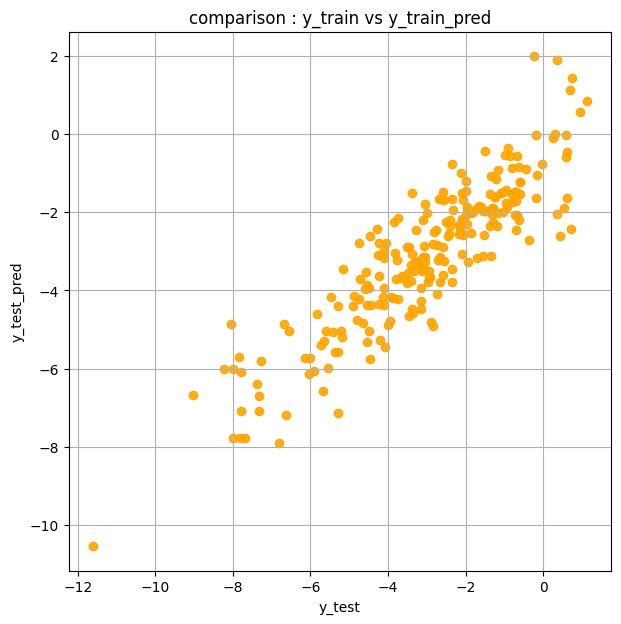

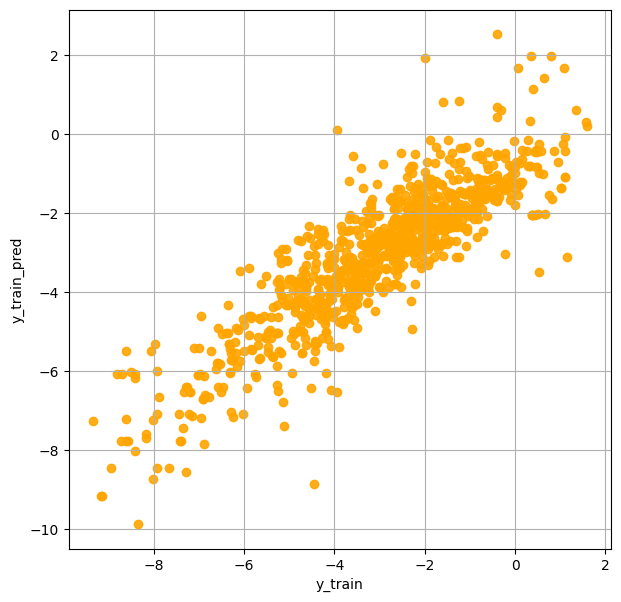

In [ ]:
import matplotlib.pyplot as plt 

plt.figure(figsize= (7,7))
plt.title("comparison : y_test vs y_test_pred")
plt.scatter(x= y_test , y= y_test_pred,color = 'orange',alpha=0.9)
plt.xlabel("y_test")
plt.ylabel("y_test_pred")
plt.grid(True)

plt.show
plt.title("comparison : y_train vs y_train_pred")
plt.figure(figsize= (7,7))
plt.scatter(x= y_train , y= y_train_pred,color = 'orange',alpha=0.9)
plt.xlabel("y_train")
plt.ylabel("y_train_pred")
plt.grid(True)
plt.show